## MobileNetSSD with OpenCV

- you can get trained model and prototxt : https://www.pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/

In [1]:
%matplotlib inline
    
# import the necessary packages
import numpy as np
import sys
from logging import getLogger, DEBUG, StreamHandler
import matplotlib.pyplot as plt
import cv2

def deep_learning_object_detection(image, prototxt, model):
        logger = getLogger(__name__)
        logger.setLevel(DEBUG)
        handler = StreamHandler(sys.stderr)
        handler.setLevel(DEBUG)
        logger.addHandler(handler)

        # construct the argument parse and parse the arguments
        CONFIDENCE = 0.2

        # initialize the list of class labels MobileNet SSD was trained to
        # detect, then generate a set of bounding box colors for each class
        CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat","bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
            "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"]
        COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))
    
        # load our serialized model from disk
        logger.info("Loading model...")

        net = cv2.dnn.readNetFromCaffe(prototxt, model)
    
        # load the input image and construct an input blob for the image
        # by resizing to a fixed 300x300 pixels and then normalizing it
        # (note: normalization is done via the authors of the MobileNet SSD
        # implementation)
        image = cv2.imread(image)
        (h, w) = image.shape[:2]
        blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)
    
        # pass the blob through the network and obtain the detections and
        # predictions
        logger.info("computing object detections...")

        net.setInput(blob)
        detections = net.forward()

        # loop over the detections
        for i in np.arange(0, detections.shape[2]):
                # extract the confidence (i.e., probability) associated with the
                # prediction
                confidence = detections[0, 0, i, 2]

                # filter out weak detections by ensuring the `confidence` is
                # greater than the minimum confidence
                if confidence > CONFIDENCE:
                    # extract the index of the class label from the `detections`,
                    # then compute the (x, y)-coordinates of the bounding box for
                    # the object
                    idx = int(detections[0, 0, i, 1])
                    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
                    (startX, startY, endX, endY) = box.astype("int")
                    
                    # display the prediction
                    label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
                    logger.info(label)

                    cv2.rectangle(image, (startX, startY), (endX, endY), COLORS[idx], 2)
                    y = startY - 15 if startY - 15 > 15 else startY + 15
                    cv2.putText(image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)

        # show the output image
        plt.imshow(image)

Loading model...
computing object detections...
car: 99.96%
car: 95.68%


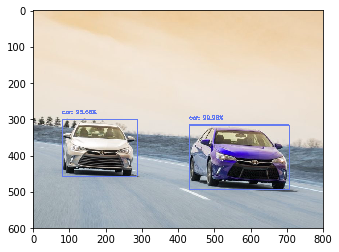

In [2]:
image = "images/example_01.jpg"
prototxt="MobileNetSSD_deploy.prototxt.txt"
model="MobileNetSSD_deploy.caffemodel"

deep_learning_object_detection(image, prototxt, model)